Stock Price Prediction

Name : YUVARAJ S

Register Number : 212222240119

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense , SimpleRNN
from keras.models import Sequential

In [2]:
dataset_train = pd.read_csv('trainset.csv')
dataset_train.columns
dataset_train.head()
train_set = dataset_train.iloc[:,1:2].values
type(train_set)
train_set.shape

(1259, 1)

In [3]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(train_set)
training_set_scaled.shape

(1259, 1)

In [4]:
X_train_array = []
y_train_array = []
for i in range(60, 1259):
  X_train_array.append(training_set_scaled[i-60:i,0])
  y_train_array.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train_array), np.array(y_train_array)
X_train1 = X_train.reshape((X_train.shape[0], X_train.shape[1],1))

X_train.shape

(1199, 60)

In [5]:
length = 60
n_features = 1

In [24]:
# Building the RNN
model = Sequential([
    SimpleRNN(50, return_sequences=True, input_shape=(length, n_features)),
    SimpleRNN(50),
    Dense(1)
])


In [25]:
print("Name: YUVARAJ.S\nRegister Number: 212222240119")
model.summary()

Name: YUVARAJ.S
Register Number: 212222240119


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)        │ (None, 60, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,701 (30.08 KB)

 Trainable params: 7,701 (30.08 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer='adam', loss='mse')

In [27]:
history=model.fit(X_train1,y_train,epochs=100, batch_size=32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.2721
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0019
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7.7273e-04
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9.1571e-04
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.6497e-04
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.1964e-04
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.0252e-04
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 6.6372e-04
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.5823e-04
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.8168e-04
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.8171e-04
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.9457e-04
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.9450e-04
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.7485e-04
Epoch 15/

In [28]:
# print test loss
print("Test loss is ",model.evaluate(X_train1,y_train))

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.5909e-04
Test loss is  0.0005369476857595146


In [29]:
dataset_test = pd.read_csv('testset.csv')
test_set = dataset_test.iloc[:,1:2].values
test_set.shape
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)

In [30]:
inputs = dataset_total.values
inputs = inputs.reshape(-1,1)
inputs_scaled=sc.transform(inputs)
X_test = []
for i in range(60,1384):
  X_test.append(inputs_scaled[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

In [31]:
X_test.shape
predicted_stock_price_scaled = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price_scaled)

42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


Name: YUVARAJ.S
Register Number: 212222240119


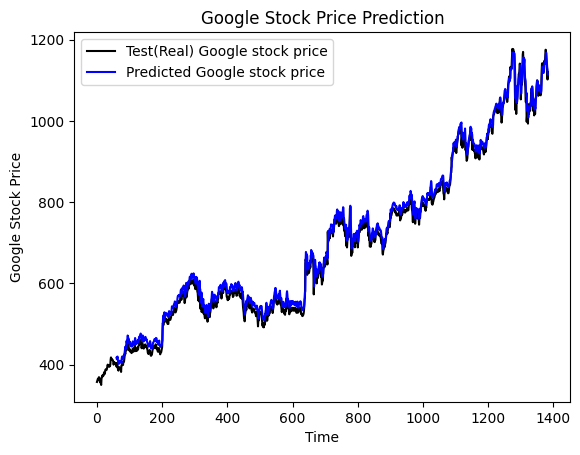

In [32]:
print("Name: YUVARAJ.S\nRegister Number: 212222240119")
plt.plot(np.arange(0,1384),inputs, color='black', label = 'Test(Real) Google stock price')
plt.plot(np.arange(60,1384),predicted_stock_price, color='blue', label = 'Predicted Google stock price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

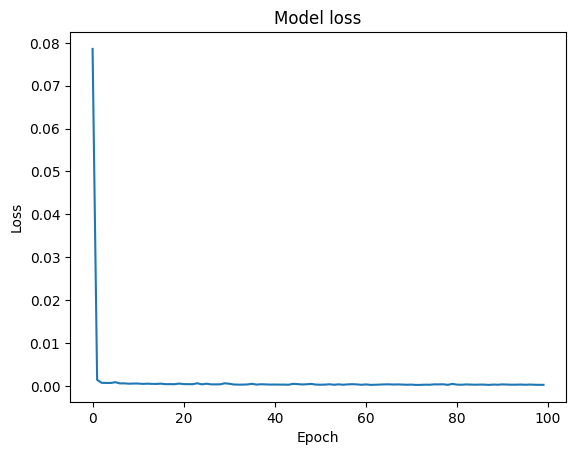

In [33]:
# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()